Part - 1:
===========

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary

In [64]:
df = pd.read_csv('dataset.csv')
print(df.describe())

               f3      target
count  766.000000  766.000000
mean    69.118799    0.349869
std     19.376901    0.477240
min      0.000000    0.000000
25%     62.500000    0.000000
50%     72.000000    0.000000
75%     80.000000    1.000000
max    122.000000    1.000000


In [65]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in f1: ['6' '1' '8' '0' '5' '3' '10' '2' '4' '7' '9' '11' '13' '15' '17' '12'
 '14' 'c']
Unique values in f2: ['148' '85' '183' '89' '137' '116' '78' '115' '197' '125' '110' '168'
 '139' '189' '166' '100' '118' '107' '103' '126' '99' '196' '119' '143'
 '147' '97' '145' '117' '109' '158' '88' '92' '122' '138' '102' '90' '111'
 '180' '133' '106' '171' '159' '146' '71' '105' '101' '176' '150' '73'
 '187' '84' '44' '141' '114' '95' '129' '79' '0' '62' '131' '112' '113'
 '74' '83' '136' '80' '123' '81' '134' '142' '144' '93' '163' '151' '96'
 '155' '76' '160' '124' '162' '132' '120' '173' '170' '128' '108' '154'
 '57' '156' '153' '188' '152' '104' '87' '75' '179' '130' '194' '181'
 '135' '184' '140' '177' '164' '91' '165' '86' '193' '191' '161' '167'
 '77' '182' '157' '178' '61' '98' '127' '82' '72' '172' '94' '175' '195'
 '68' '186' '198' '121' '67' '174' '199' '56' '169' '149' '65' '190' 'f']
Unique values in f3: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  

In [66]:
# we see that there are alphabets in numeric columns so we replace them with mean of that respective column
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)
df.tail

<bound method NDFrame.tail of             f1     f2  f3         f4          f5        f6        f7  target
0     6.000000  148.0  72  35.000000    0.000000  33.60000  0.627000       1
1     1.000000   85.0  66  29.000000    0.000000  26.60000  0.351000       0
2     8.000000  183.0  64   0.000000    0.000000  23.30000  0.672000       1
3     1.000000   89.0  66  23.000000   94.000000  28.10000  0.167000       0
4     0.000000  137.0  40  35.000000  168.000000  43.10000  2.288000       1
..         ...    ...  ..        ...         ...       ...       ...     ...
761   9.000000   89.0  62   0.000000    0.000000  22.50000  0.472128       0
762  10.000000  101.0  76  48.000000  180.000000  31.99817  0.171000       0
763   2.000000  122.0  70  27.000000   80.091503  36.80000  0.340000       0
764   3.849673  121.0  72  23.000000  112.000000  26.20000  0.245000       0
765   1.000000  126.0  60  20.542484    0.000000  30.10000  0.349000       1

[766 rows x 8 columns]>

C:\Users\Shishir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shishir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


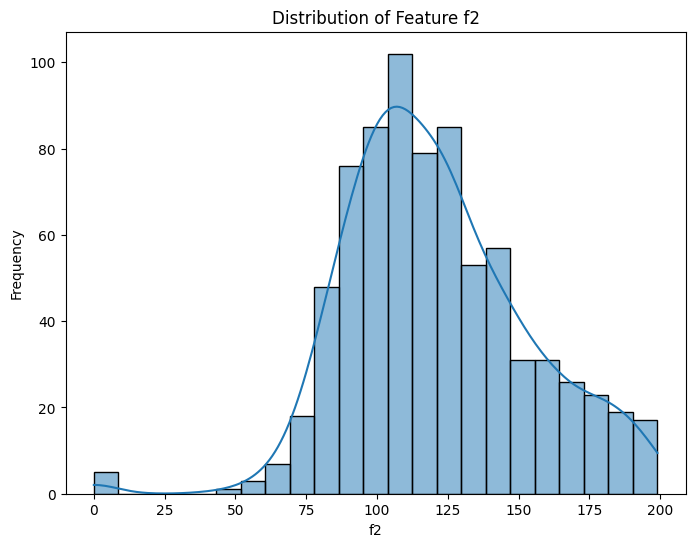

In [67]:
plt.figure(figsize=(8, 6))
sns.histplot(df['f2'], kde=True)
plt.title('Distribution of Feature f2')
plt.xlabel('f2')
plt.ylabel('Frequency')
plt.show()

C:\Users\Shishir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shishir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shishir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shishir\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

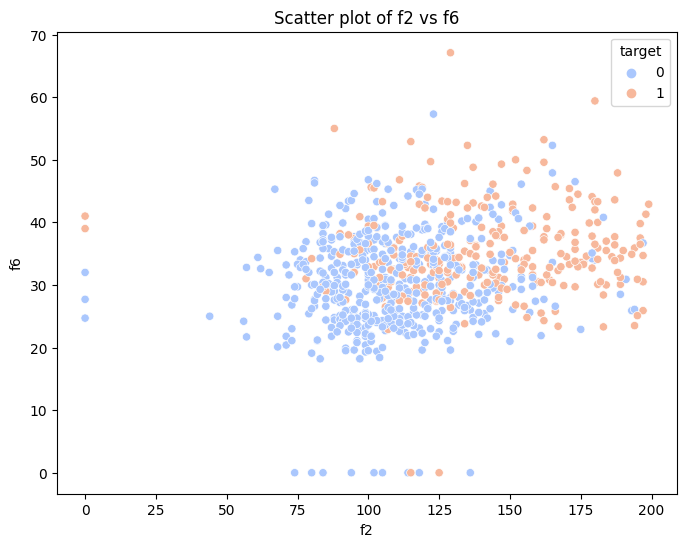

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='f2', y='f6', hue='target', palette='coolwarm')
plt.title('Scatter plot of f2 vs f6')
plt.xlabel('f2')
plt.ylabel('f6')
plt.show()

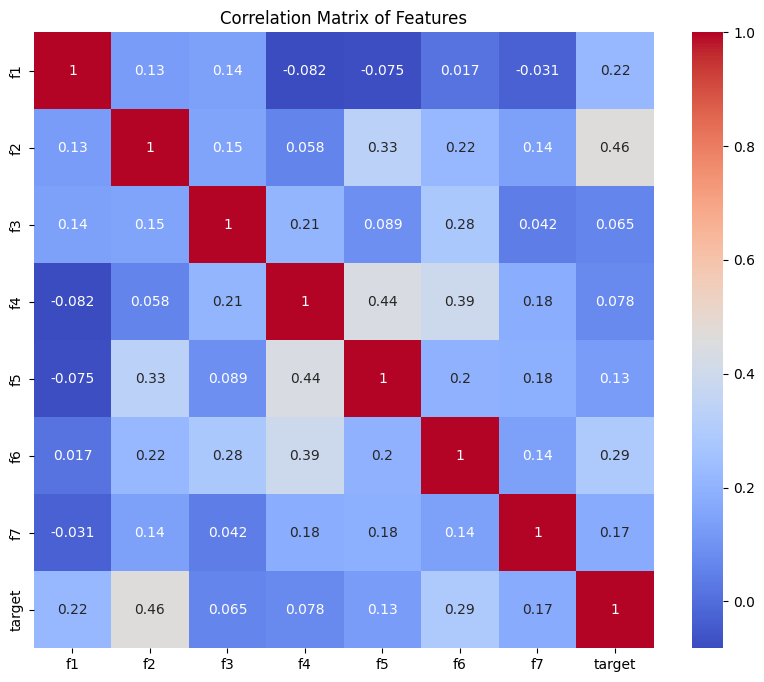

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [72]:
scaler = StandardScaler()
df1 = df.drop('target', axis=1)
column = df1.columns
df1[column] = scaler.fit_transform(df1[column])
df1['target'] = df['target']
df1.tail

<bound method NDFrame.tail of                f1        f2        f3            f4        f5            f6  \
0    6.382139e-01  0.849057  0.148790  9.070150e-01 -0.695096  2.030729e-01   
1   -8.457789e-01 -1.125480 -0.161060  5.305956e-01 -0.695096 -6.843559e-01   
2    1.231811e+00  1.946022 -0.264343 -1.288765e+00 -0.695096 -1.102715e+00   
3   -8.457789e-01 -1.000113 -0.161060  1.541762e-01  0.120709 -4.941926e-01   
4   -1.142577e+00  0.504297 -1.503740  9.070150e-01  0.762938  1.407440e+00   
..            ...       ...       ...           ...       ...           ...   
761  1.528610e+00 -1.000113 -0.367626 -1.288765e+00 -0.695096 -1.204136e+00   
762  1.825408e+00 -0.624010  0.355356  1.722590e+00  0.867083  4.503972e-16   
763 -5.489804e-01  0.034169  0.045507  4.051224e-01  0.000000  6.087546e-01   
764  1.318050e-16  0.002827  0.148790  1.541762e-01  0.276927 -7.350661e-01   
765 -8.457789e-01  0.159536 -0.470909  2.228851e-16 -0.695096 -2.406415e-01   

               f7  ta

In [76]:
X = df.drop('target', axis=1)  # Replace 'target_column' with the actual target column name
Y = df['target']
ros = RandomOverSampler(random_state=42)
X, Y = ros.fit_resample(X, Y)
# Split the data into training and testing sets (80% train, 20% test by default)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.175, random_state=42)

In [79]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
Y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
print("X_train size: ", X_train_tensor.shape)
print("Y_train size: ", Y_train_tensor.shape)
print("X_val size: ", X_val_tensor.shape)
print("Y_val size: ", Y_val_tensor.shape)
print("X_test size: ", X_test_tensor.shape)
print("Y_test size: ", Y_test_tensor.shape)

X_train size:  torch.Size([697, 7])
Y_train size:  torch.Size([697])
X_val size:  torch.Size([149, 7])
Y_val size:  torch.Size([149])
X_test size:  torch.Size([150, 7])
Y_test size:  torch.Size([150])


In [82]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
        self.fc2 = nn.Linear(hidden_size, hidden_size) # Second hidden layer
        self.fc3 = nn.Linear(hidden_size, output_size) # Output layer
        self.relu = nn.ReLU()  # Activation function
        self.dropout = nn.Dropout(0.5)  # Dropout for regularization

    def forward(self, x):
        # Forward pass through the network
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Dropout after first hidden layer

        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)  # Dropout after second hidden layer

        x = self.fc3(x)  # Output layer (activation depends on problem type)
        return x

# Initialize your model
input_size = X_train_tensor.shape[1]  # Number of input features
hidden_size = 64  # You can try 64 or 128 as suggested
output_size = 1  # For regression, 1 output neuron, for classification, use the number of classes

model = SimpleNN(input_size, hidden_size, output_size)

# Print model summary
summary(model, input_size=(32, input_size))  # 32 is the batch size, adjust as necessary

# Define Loss Function and Optimizer
criterion = nn.MSELoss()  # For regression (use nn.CrossEntropyLoss for classification)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Example training loop (for demonstration purposes)
num_epochs = 10
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor.view(-1, 1))  # Reshape Y for regression
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 236.9092
Epoch [2/10], Loss: 225.3358
Epoch [3/10], Loss: 184.5558
Epoch [4/10], Loss: 176.7666
Epoch [5/10], Loss: 192.8866
Epoch [6/10], Loss: 140.2976
Epoch [7/10], Loss: 137.7738
Epoch [8/10], Loss: 113.9344
Epoch [9/10], Loss: 108.9097
Epoch [10/10], Loss: 122.6244
